## Task
Explore `xboost` in Python/scikit-learn with the Pima Indian dataset from UCI


## Notebook Summary
* [Import data](#import_data)
* [Explore data](#explore_data)
* [Train model](#train_model)
* [Predict](#predict)
* [Save model](#save_model)

## References
* [Pima Indians Diabetes data set](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)
* http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/


In [97]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
print 'python.version = ', platform.python_version()
import IPython
print 'ipython.version =', IPython.version_info

import pandas as pd
print 'pandas.version = ', pd.__version__
import sklearn
print 'sklearn.version = ', sklearn.__version__
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost
print 'xgboost.version = ', xgboost.__version__

%matplotlib inline

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__

import pickle

python.version =  2.7.10
ipython.version = (5, 1, 0, '')
pandas.version =  0.19.2
sklearn.version =  0.18.1
xgboost.version =  0.6
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


<a id="import_data" />
## Data


* Data: https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
* Annotation: https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names
* Data contains only females over the age of 21 
* Columns in data file:
 1. Number of times pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)
 9. (**Response**) Class variable (0 or 1); 1 => has diabetes


In [98]:
# import data - files were previously downloaded from links above
colnames = [
    'num_pregnancies',
    'gluc_conc',
    'bp',
    'skin_thickness',
    'insulin_conc',
    'bmi',
    'diab_ped_func',
    'age',
    'has_diabetes'
]
data = pd.read_csv('pima-indians-diabetes.data', names=colnames)
data.head()

print 'shape={}\n\
ndim={}\n\
size={}\n\n\
dtype=\n{}'.format(data.shape, data.ndim, data.size, data.dtypes)


,num_pregnancies,gluc_conc,bp,skin_thickness,insulin_conc,bmi,diab_ped_func,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


shape=(768, 9)
ndim=2
size=6912

dtype=
num_pregnancies      int64
gluc_conc            int64
bp                   int64
skin_thickness       int64
insulin_conc         int64
bmi                float64
diab_ped_func      float64
age                  int64
has_diabetes         int64
dtype: object


<a id='explore_data' />
## Explore data

In [99]:
# Column summary
print 'Summary of co-variates:'
data['has_diabetes'] = data['has_diabetes'].astype('category')
data.describe()

# response is categorical and won't show up in above description
print 'Summary of response variable:'
data['has_diabetes'].describe()


Summary of co-variates:


,num_pregnancies,gluc_conc,bp,skin_thickness,insulin_conc,bmi,diab_ped_func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Summary of response variable:


count     768
unique      2
top         0
freq      500
Name: has_diabetes, dtype: int64

<a id='prepare_data' />
## Prepare data

In [100]:
# Split data into training and test sets
# Training - 2/3 rd
# Test - 1/3 rd

X = data[range(8)]
X.head()
Y = data['has_diabetes']
Y.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train.shape, Y_train.shape
X_test.shape, Y_test.shape


,num_pregnancies,gluc_conc,bp,skin_thickness,insulin_conc,bmi,diab_ped_func,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: has_diabetes, dtype: category
Categories (2, int64): [0, 1]

((514, 8), (514,))

((254, 8), (254,))

<a id='train_model' />
## Train model

In [101]:
model = xgboost.XGBClassifier()
model.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

<a id='predict' />
## Predict & evaluate


Accuracy = 0.713 



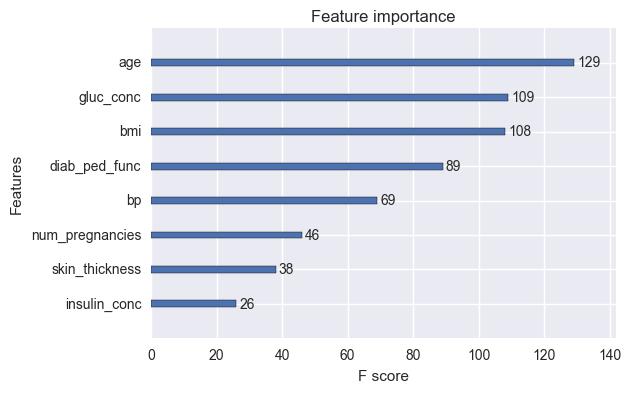

In [102]:
Y_pred = model.predict(X_test)
pd.Series(y_pred, dtype='category').describe()

acc = accuracy_score(Y_test, Y_pred)
print 'Accuracy =', round(acc,3), '\n'


xgboost.plot_importance(model);


<a id='save_model' />
## Save model

In [103]:
model_file = open('pima-xgboost.model', 'wb')
pickle.dump(model, model_file)

# To use model later
# model_file = open('pima-xgboost.model', 'rb')
# saved_model = pickle.load(model_file)
# Y_pred = saved_model.predict(X_new)
